In [1]:
import sys
import os
import numpy as np 
import networkx as nx
current = os.getcwd()
parent = os.path.dirname(current)
sys.path.append(parent)
from numpy.linalg import inv,multi_dot
from scipy.linalg import expm
from matplotlib import pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
import pydot
import copy
from collections import Counter
from sklearn.pipeline import Pipeline
import Kernels
from Kernels.Random_Walk import Random_Walk
from Kernels.Shortest_Path import Shortest_Path
from Kernels.Weisfeiler_Lehman import Weisfeiler_Lehman
#from Kernels.WL_Version1 import Weisfeiler_Lehman
from Kernels.WL_Transformer import WL_Transformer
from Kernels.WL_edge import WL_edge
from Kernels.WL_Shortest_Path import WL_Shortest_Path
from Kernels.three_node_graphlet_kernel import Three_node_graphlet_kernel
from Kernels.k_node_graphlet_kernel import k_node_graphlet_kernel
from Kernels.Shortest_Path_Labelled import Shortest_Path_Labelled
from Kernels.utils import hierarchy_pos,get_nxgraph_from_adjanecy_matrix,count_commons,transform_labels_to_integers_from_a_list_of_graphs


In [23]:
H2O_adjacency = [[0, 1, 1], [1, 0, 0], [1, 0, 0]]
H3O_adjacency = [[0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]]
teacher_adj=[[0,1,1,0,0],[1,0,0,1,0],[1,0,0,0,1],[0,1,0,0,0],[0,0,1,0,0]]
teacher_2_adj=[[0,1,1,0],[1,0,0,1],[1,0,0,1],[0,1,1,0]]
bn=[[0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
         1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0.]]

In [24]:
G1=get_nxgraph_from_adjanecy_matrix(np.array(H2O_adjacency))
G2=get_nxgraph_from_adjanecy_matrix(np.array(H3O_adjacency))
G3=get_nxgraph_from_adjanecy_matrix(np.array(teacher_adj))
G4=get_nxgraph_from_adjanecy_matrix(np.array(teacher_2_adj))
G5=get_nxgraph_from_adjanecy_matrix(np.array(teacher_2_adj))
G6=get_nxgraph_from_adjanecy_matrix(np.array(bn))

[(0, {'node_label': 'O'}), (1, {'node_label': 'H'}), (2, {'node_label': 'H'})]


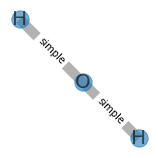

[(0, {'node_label': 'O'}), (1, {'node_label': 'H'}), (2, {'node_label': 'H'}), (3, {'node_label': 'H'})]


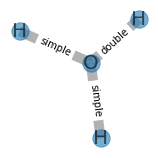

[(0, {'node_label': '0'}), (1, {'node_label': '1'}), (2, {'node_label': '2'}), (3, {'node_label': '3'}), (4, {'node_label': '3'})]


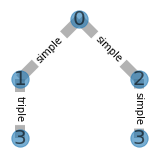

[(0, {'node_label': '0'}), (1, {'node_label': '1'}), (2, {'node_label': '2'}), (3, {'node_label': '3'})]


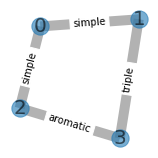

In [25]:
plt.rcParams["figure.figsize"] = (2,2)
edge_labels={(0,1): 'simple',
            (0,2):'simple',
             (0,3): 'double',
             (1,3):'triple',
             (2,4):'simple',
             (2,3):'aromatic',
            }


weights={(0,1):4,
         (0,2):3,
         (0,3):5,
         (1,3):1,
         (2,4):1,
        (2,3):3}
nx.set_edge_attributes(G1, weights,name='weight')
nx.set_edge_attributes(G2, weights,name='weight')
nx.set_edge_attributes(G3, weights,name='weight')
nx.set_edge_attributes(G4, weights,name='weight')

nx.set_edge_attributes(G1, edge_labels, name='edge_label')
nx.set_edge_attributes(G2, edge_labels, name='edge_label')
nx.set_edge_attributes(G3, edge_labels, name='edge_label')
nx.set_edge_attributes(G4, edge_labels, name='edge_label')

G1.nodes[1]['node_label'] = 'H'
G1.nodes[0]['node_label'] = 'O'
G1.nodes[2]['node_label'] = 'H'
print(G1.nodes.data())
labels = nx.get_node_attributes(G1,'node_label')
pos1 = nx.spring_layout(G1)
nx.draw(G1, pos1,labels=labels,with_labels = True,width = 10, font_size=20, alpha=0.6, edge_color="gray", node_shape=None)
nx.draw_networkx_edge_labels(G1,pos1,edge_labels=nx.get_edge_attributes(G1,'edge_label'))
plt.show()

G2.nodes[1]['node_label'] = 'H'
G2.nodes[0]['node_label'] = 'O'
G2.nodes[2]['node_label'] = 'H'
G2.nodes[3]['node_label'] = 'H'
print(G2.nodes.data())
pos2 = nx.spring_layout(G2)
labels = nx.get_node_attributes(G2,'node_label')
nx.draw(G2, pos2,labels=labels, with_labels = True,width = 10, font_size=20, alpha=0.6, edge_color="gray", node_shape=None)
nx.draw_networkx_edge_labels(G2,pos2,edge_labels=nx.get_edge_attributes(G2,'edge_label'))

plt.show()
G3.nodes[0]['node_label'] = '0'
G3.nodes[1]['node_label'] = '1'
G3.nodes[2]['node_label'] = '2'
G3.nodes[3]['node_label'] = '3'
G3.nodes[4]['node_label'] = '3'
print(G3.nodes.data())
labels = nx.get_node_attributes(G3,'node_label')
pos3 = hierarchy_pos(G3,0)  
nx.draw(G3, pos3,labels=labels,with_labels = True,width = 10, font_size=20, alpha=0.6, edge_color="gray", node_shape=None)
nx.draw_networkx_edge_labels(G3,pos3,edge_labels=nx.get_edge_attributes(G3,'edge_label'))
plt.show()

G4.nodes[0]['node_label'] = '0'
G4.nodes[1]['node_label'] = '1'
G4.nodes[2]['node_label'] = '2'
G4.nodes[3]['node_label'] = '3'

print(G4.nodes.data())
labels = nx.get_node_attributes(G4,'node_label')
pos4 = nx.spring_layout(G4)  
nx.draw(G4, pos4,labels=labels,with_labels = True,width = 10, font_size=20, alpha=0.6, edge_color="gray", node_shape=None)
nx.draw_networkx_edge_labels(G4,pos4,edge_labels=nx.get_edge_attributes(G4,'edge_label'))
plt.show()

In [10]:
GN=[G1,G2,G3,G4]

for g in GN:
    print (g.nodes(data=True))

[(0, {'node_label': 'O'}), (1, {'node_label': 'H'}), (2, {'node_label': 'H'})]
[(0, {'node_label': 'O'}), (1, {'node_label': 'H'}), (2, {'node_label': 'H'}), (3, {'node_label': 'H'})]
[(0, {'node_label': '0'}), (1, {'node_label': '1'}), (2, {'node_label': '2'}), (3, {'node_label': '3'}), (4, {'node_label': '3'})]
[(0, {'node_label': '0'}), (1, {'node_label': '1'}), (2, {'node_label': '2'}), (3, {'node_label': '3'})]


In [11]:
graph_list=[G3,G4]
GN=[G1,G2,G3,G4]

pipe = Pipeline(
    steps=[
        ("vectors_at_h_0", WL_Transformer(h=0))
    ]
)
transformed_graphs = pipe.fit_transform(graph_list)
print(transformed_graphs)

[[1 1]
 [1 1]
 [1 1]
 [2 1]
 [0 0]]


In [12]:
kernel=Shortest_Path(normalise=True)
kernel.fit(GN[2:])
kernel.transform(GN[:2])
#dictionary=kernel.get_phi()

array([[0.72168784, 0.91287093],
       [0.91855865, 0.77459667]])

In [13]:
kernel=Random_Walk(normalise=True, kernel_type='geometric')
kernel.fit_transform(GN)

array([[1.        , 0.85627504, 1.05021175, 0.71018381],
       [0.85627504, 1.        , 1.38311938, 1.43237891],
       [1.05021175, 1.38311938, 1.        , 0.73488234],
       [0.71018381, 1.43237891, 0.73488234, 1.        ]])

In [14]:
kernel2=Weisfeiler_Lehman(normalise=True,h=0,node_label='node_label')
kernel2.fit(GN[:4])
kernel2.transform(GN[:4])

array([[1.        , 0.98994949, 0.        , 0.        ],
       [0.98994949, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.94491118],
       [0.        , 0.        , 0.94491118, 1.        ]])

In [16]:
kernel=WL_Shortest_Path(normalise=True,h=0,node_label='node_label',edge_weight='weight')
kernel.fit(GN[:2])
kernel.fit_transform(GN[2:])
#dictionary=kernel.get_phi

array([[1.        , 0.51639778],
       [0.51639778, 1.        ]])

In [17]:
kernel=WL_edge(normalise=True,h=0,edge_label='edge_label')
kernel.fit(GN)
kernel.fit_transform(GN[:3])


array([[1.        , 0.81649658, 0.70710678],
       [0.81649658, 1.        , 0.57735027],
       [0.70710678, 0.57735027, 1.        ]])

In [18]:
list(nx.get_node_attributes(G1, 'node_label').values())

['O', 'H', 'H']

In [19]:
kernel=Three_node_graphlet_kernel(normalise=True)
kernel.fit(GN)
kernel.transform(GN[:3])

array([[1.        , 0.95864687, 0.52042093, 1.        ],
       [0.97195877, 0.9986889 , 0.53030322, 0.97195877],
       [0.4347333 , 0.46129649, 0.99418213, 0.4347333 ]])

In [20]:
kernel.fit([G6,G1])


In [2]:
from sklearn import preprocessing
def transforms_labels_to_integers_from_a_list_of_graphs(Gn,node_label='node_label'):
    le = preprocessing.LabelEncoder()
    new_g=[]
    all_labels_ori=set()
    for idx, G in enumerate(Gn):
        labels_ori=(list(nx.get_node_attributes(G, node_label).values()))
        if  isinstance(labels_ori[0], np.ndarray):
            labels_ori=["".join(map(str, (item.astype(int)))) for item in labels_ori]
            for i,node in enumerate(G.nodes(data=True)):
                node[1][node_label]=labels_ori[i]
        all_labels_ori.update(labels_ori)
        le.fit([i for i in list(all_labels_ori)])
    
        for i,node in enumerate(G.nodes(data=True)):#
            node[1][node_label]=le.transform([labels_ori[i]])[0]+1
        new_g.append(G)
        
    return new_g

In [3]:
new_GN=transforms_labels_to_integers_from_a_list_of_graphs(GN)

kernel=Shortest_Path_Labelled(node_label='node_label')
kernel.fit(new_GN[3:])
kernel.transform(new_GN[:3])



NameError: name 'GN' is not defined